**DROPOUT AND BATCH NORMALIZATION**

In [1]:
import pandas as pd
red_wine = pd.read_csv('red-wine.csv')

In [4]:
from sklearn.model_selection import train_test_split
y = red_wine['quality']
X = red_wine.drop(['quality'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
        train_size=0.7, test_size=0.3, random_state=0)

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(1024, activation='relu', input_shape=[11]),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  layers.Dense(1024, activation='relu'),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  layers.Dense(1024, activation='relu'),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  layers.Dense(1),
])

/Users/asaucedov/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
  optimizer='adam',
  loss='mae',
)

In [8]:
history = model.fit(
  X_train, y_train,
  validation_data=(X_valid, y_valid),
  batch_size=256,
  epochs=100,
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 5.6250 - val_loss: 4.4879
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.4234 - val_loss: 8.9109
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 5.2147 - val_loss: 7.7452
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 4.9688 - val_loss: 6.5135
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 4.7390 - val_loss: 8.3305
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 4.3964 - val_loss: 6.7216
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 4.0689 - val_loss: 3.2879
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.6806 - val_loss: 7.0813
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3.2716 - val_loss: 5.1010
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 2.8438 - val_loss: 1.2651
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.3361 - val_loss: 4.2180
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.9661 - val_lo

<Axes: >

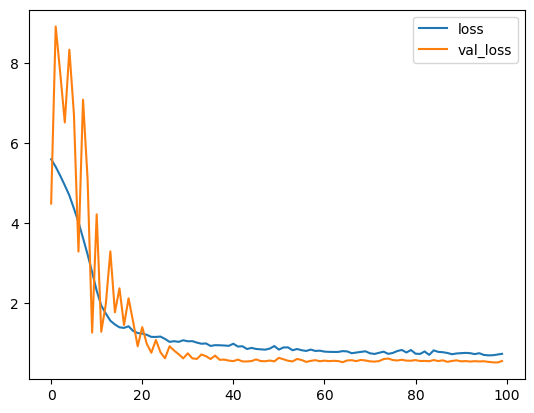

In [9]:
history_df = pd.DataFrame(history.history)
history_df.plot()